In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.constraints import non_neg
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from keras.layers.normalization import BatchNormalization
from keras import optimizers

print(tf.__version__)

C:\Users\kks20\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.11.0


In [2]:
df = pd.read_csv('C:/python/data/MSBD5001/train.csv')
df.head()

,id,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time
0,0,none,0.304083,0.0001,417,475,-1,1089,327,4,3,7,0.074798,24.242009,0.409987
1,1,l1,0.727744,0.0010,578,569,1,790,373,4,5,7,0.077781,54.626302,3.950953
2,2,none,0.745885,0.0100,588,529,2,428,1198,2,5,6,0.030196,17.999964,0.368702
3,3,none,0.474605,0.0010,829,103,4,877,313,6,5,7,0.057261,82.257222,1.004559
4,4,elasticnet,0.395049,0.0010,167,418,2,216,644,8,5,11,0.073728,95.515601,0.802800


In [3]:
df_n1 = df.n_features / df.scale
df_n2 = df.n_informative / df.n_classes
df_n3 = df.n_samples *df.n_features/df.n_informative / df.n_classes/df.max_iter

df['df_n1'] = df_n1
df['df_n2'] = df_n2
df['df_n3'] = df_n3
df = df.drop('random_state',1)
df = df.drop('n_clusters_per_class',1)
df = df.drop('scale',1)
df = df.drop('alpha',1)
df.head()


,id,penalty,l1_ratio,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,time,df_n1,df_n2,df_n3
0,0,none,0.304083,417,-1,1089,327,4,7,0.074798,0.409987,13.488981,1.750000,30.498715
1,1,l1,0.727744,578,1,790,373,4,7,0.077781,3.950953,6.828213,1.750000,18.207489
2,2,none,0.745885,588,2,428,1198,2,6,0.030196,0.368702,66.555689,3.000000,72.667800
3,3,none,0.474605,829,4,877,313,6,7,0.057261,1.004559,3.805137,1.166667,7.883882
4,4,elasticnet,0.395049,167,2,216,644,8,11,0.073728,0.802800,6.742354,1.375000,9.465433


In [4]:
df2 = pd.get_dummies(df['penalty'])
df2.head()

,elasticnet,l1,l2,none
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0


In [5]:
df.n_jobs[df.n_jobs <0] = 16

df.head()

C:\Users\kks20\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,penalty,l1_ratio,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,time,df_n1,df_n2,df_n3
0,0,none,0.304083,417,16,1089,327,4,7,0.074798,0.409987,13.488981,1.750000,30.498715
1,1,l1,0.727744,578,1,790,373,4,7,0.077781,3.950953,6.828213,1.750000,18.207489
2,2,none,0.745885,588,2,428,1198,2,6,0.030196,0.368702,66.555689,3.000000,72.667800
3,3,none,0.474605,829,4,877,313,6,7,0.057261,1.004559,3.805137,1.166667,7.883882
4,4,elasticnet,0.395049,167,2,216,644,8,11,0.073728,0.802800,6.742354,1.375000,9.465433


In [6]:
df3=df.join(df2)
df3.head()

,id,penalty,l1_ratio,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,time,df_n1,df_n2,df_n3,elasticnet,l1,l2,none
0,0,none,0.304083,417,16,1089,327,4,7,0.074798,0.409987,13.488981,1.750000,30.498715,0,0,0,1
1,1,l1,0.727744,578,1,790,373,4,7,0.077781,3.950953,6.828213,1.750000,18.207489,0,1,0,0
2,2,none,0.745885,588,2,428,1198,2,6,0.030196,0.368702,66.555689,3.000000,72.667800,0,0,0,1
3,3,none,0.474605,829,4,877,313,6,7,0.057261,1.004559,3.805137,1.166667,7.883882,0,0,0,1
4,4,elasticnet,0.395049,167,2,216,644,8,11,0.073728,0.802800,6.742354,1.375000,9.465433,1,0,0,0


In [7]:
correlation = df3.corr(method='pearson')
columns = correlation.nlargest(20, 'time').index
columns

Index(['time', 'n_samples', 'max_iter', 'elasticnet', 'n_features', 'l1',
       'n_classes', 'df_n1', 'flip_y', 'n_informative', 'id', 'l1_ratio',
       'df_n3', 'df_n2', 'none', 'l2', 'n_jobs'],
      dtype='object')

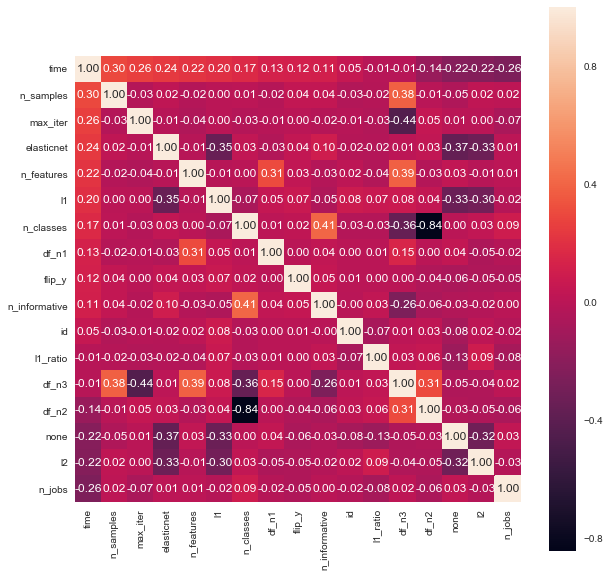

In [8]:
correlation_map = np.corrcoef(df3[columns].values.T)
sns.set(font_scale=1.0)
pyplot.figure(figsize=(10, 10))
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [9]:
test=pd.read_csv('C:/python/data/MSBD5001/test.csv')
test2 = pd.get_dummies(test['penalty'])
test_n1= test.n_features/test.scale
test_n2= test.n_informative/test.n_classes
test_n3= test.n_samples * test.n_features/test.n_informative / test.n_classes / test.max_iter
test=test.drop('random_state',1)
test = test.drop('n_clusters_per_class',1)

test = test.drop('alpha',1)

test = test.drop('scale',1)
test['test_n1'] = test_n1
test['test_n2'] = test_n2
test['test_n3'] = test_n3
test.n_jobs[test.n_jobs <0] = 16
test3=test.join(test2)

test3.head()

C:\Users\kks20\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,id,penalty,l1_ratio,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,test_n1,test_n2,test_n3,elasticnet,l1,l2,none
0,0,l2,0.690384,602,4,1376,1078,3,8,0.049072,26.400373,2.666667,102.666667,0,0,1,0
1,1,elasticnet,0.215088,522,4,598,1528,10,11,0.041393,22.270307,1.100000,15.913340,1,0,0,0
2,2,l2,0.217458,398,16,553,1008,8,8,0.005987,16.333438,1.000000,21.883794,0,0,1,0
3,3,none,0.120303,439,16,1977,1319,3,10,0.002964,22.496557,3.333333,198.000228,0,0,0,1
4,4,none,0.458851,278,4,1826,1530,7,8,0.050126,17.522687,1.142857,179.456578,0,0,0,1


In [10]:
good=pd.read_csv('C:/Users/kks20/3.134.csv')
good.head()
pdtion=good.values
Y_1=pdtion[:,1]
print(Y_1)

[ 2.2506306   6.6986446   0.41097748  1.0744393   3.4455285   9.068525
  2.7609649   0.41097748 13.136022    0.41097748  4.489974    7.4169054
  0.41097748 30.672426    0.41097748  0.41097748  0.62560815 11.987622
 12.26228     1.0687993   0.41097748  0.41097748  0.41097748  0.8638485
  1.440989    2.173966    2.2852175   3.6170368   1.1456479   4.513296
 16.965025    1.8711334   0.41097748  8.957732    6.845885    0.7653979
  2.7401524   2.732891    0.41097748  1.561468    4.636477   13.081025
  1.5244172   5.7117724   1.7148718   0.42383376  1.9928173   0.41097748
  5.1928425   1.3919914   0.41097748 16.54427     0.41097748  5.9174285
 19.167599    0.41097748  0.41097748  0.41097748  0.41097748  0.9888045
  1.5898832   6.4049187   0.41097748  6.9882207   1.667243    8.551402
  2.365253    0.41097748  9.406432    0.41097748  0.41097748  0.41097748
 10.119938    0.41097748  3.7017212   4.3007555   1.9274052   5.3192472
  1.9161068   0.41097748  6.681486    5.7681246   6.0250287   1.883

In [11]:
df4=df3.drop('time',1)
dataset=df3.values
dataset2=df4.values
print(dataset)
print(dataset2)

[[0 'none' 0.3040826375906649 ... 0 0 1]
 [1 'l1' 0.7277441802627995 ... 1 0 0]
 [2 'none' 0.745885421981778 ... 0 0 1]
 ...
 [397 'none' 0.283562997049592 ... 0 0 1]
 [398 'l2' 0.5359668563151643 ... 0 1 0]
 [399 'l2' 0.3975316231588546 ... 0 1 0]]
[[0 'none' 0.3040826375906649 ... 0 0 1]
 [1 'l1' 0.7277441802627995 ... 1 0 0]
 [2 'none' 0.745885421981778 ... 0 0 1]
 ...
 [397 'none' 0.283562997049592 ... 0 0 1]
 [398 'l2' 0.5359668563151643 ... 0 1 0]
 [399 'l2' 0.3975316231588546 ... 0 1 0]]


In [12]:
X_train=dataset2[:,2:19]
Y_train=dataset[:,10]
print(X_train)
print(Y_train)

[[0.3040826375906649 417 16 ... 0 0 1]
 [0.7277441802627995 578 1 ... 1 0 0]
 [0.745885421981778 588 2 ... 0 0 1]
 ...
 [0.283562997049592 789 2 ... 0 0 1]
 [0.5359668563151643 691 8 ... 0 1 0]
 [0.3975316231588546 400 1 ... 0 1 0]]
[0.40998721122741705 3.9509527683258057 0.3687019348144531
 1.0045590400695799 0.802800178527832 7.916113138198851 2.2060620784759517
 2.407142639160156 1.0023410320281982 1.6071443557739258
 0.9056992530822754 1.0038418769836426 0.8033866882324219
 1.2073915004730225 1.5073115825653076 0.10173439979553224
 1.564079523086548 0.6033122539520264 1.4056007862091064 6.013842105865479
 0.10415363311767578 0.5041308403015137 0.6031734943389893
 0.3086137771606445 3.1070635318756104 0.5425331592559814
 3.107123851776123 0.30266284942626953 0.30745291709899897
 2.7064526081085205 0.7103745937347412 0.4031496047973633
 0.2023482322692871 3.708951234817505 0.8034977912902832
 2.9064099788665767 5.011070013046265 0.20430803298950195
 22.135640382766727 0.1030123233795

In [13]:
testingset=test3.values
X_test=testingset[:,2:19]
print(X_test)

[[0.6903840136723245 602 4 ... 0 1 0]
 [0.2150878832512123 522 4 ... 0 0 0]
 [0.21745822662950715 398 16 ... 0 1 0]
 ...
 [0.6871744721962043 298 16 ... 0 1 0]
 [0.6314030966103252 800 4 ... 0 0 1]
 [0.6418181593022373 269 1 ... 0 1 0]]


Epoch 1/3000
 - 0s - loss: 28.7873
Epoch 2/3000
 - 0s - loss: 24.4065
Epoch 3/3000
 - 0s - loss: 24.1237
Epoch 4/3000
 - 0s - loss: 23.8232
Epoch 5/3000
 - 0s - loss: 23.6072
Epoch 6/3000
 - 0s - loss: 23.4097
Epoch 7/3000
 - 0s - loss: 23.2829
Epoch 8/3000
 - 0s - loss: 23.1205
Epoch 9/3000
 - 0s - loss: 23.0553
Epoch 10/3000
 - 0s - loss: 22.7978
Epoch 11/3000
 - 0s - loss: 22.7978
Epoch 12/3000
 - 0s - loss: 22.3940
Epoch 13/3000
 - 0s - loss: 22.3064
Epoch 14/3000
 - 0s - loss: 22.2456
Epoch 15/3000
 - 0s - loss: 22.2036
Epoch 16/3000
 - 0s - loss: 22.1085
Epoch 17/3000
 - 0s - loss: 21.8265
Epoch 18/3000
 - 0s - loss: 21.4849
Epoch 19/3000
 - 0s - loss: 20.9240
Epoch 20/3000
 - 0s - loss: 20.8535
Epoch 21/3000
 - 0s - loss: 20.8312
Epoch 22/3000
 - 0s - loss: 20.5905
Epoch 23/3000
 - 0s - loss: 20.2187
Epoch 24/3000
 - 0s - loss: 20.2574
Epoch 25/3000
 - 0s - loss: 20.6696
Epoch 26/3000
 - 0s - loss: 20.2028
Epoch 27/3000
 - 0s - loss: 19.7776
Epoch 28/3000
 - 0s - loss: 19.6499
E

 - 0s - loss: 4.3382
Epoch 229/3000
 - 0s - loss: 3.3086
Epoch 230/3000
 - 0s - loss: 3.1231
Epoch 231/3000
 - 0s - loss: 3.4604
Epoch 232/3000
 - 0s - loss: 3.9601
Epoch 233/3000
 - 0s - loss: 3.0372
Epoch 234/3000
 - 0s - loss: 3.0985
Epoch 235/3000
 - 0s - loss: 4.6739
Epoch 236/3000
 - 0s - loss: 4.2917
Epoch 237/3000
 - 0s - loss: 4.2724
Epoch 238/3000
 - 0s - loss: 4.2973
Epoch 239/3000
 - 0s - loss: 4.2596
Epoch 240/3000
 - 0s - loss: 3.0836
Epoch 241/3000
 - 0s - loss: 3.2771
Epoch 242/3000
 - 0s - loss: 3.2899
Epoch 243/3000
 - 0s - loss: 3.0473
Epoch 244/3000
 - 0s - loss: 3.1722
Epoch 245/3000
 - 0s - loss: 3.0384
Epoch 246/3000
 - 0s - loss: 2.8007
Epoch 247/3000
 - 0s - loss: 4.4634
Epoch 248/3000
 - 0s - loss: 4.4101
Epoch 249/3000
 - 0s - loss: 3.0121
Epoch 250/3000
 - 0s - loss: 3.0982
Epoch 251/3000
 - 0s - loss: 2.8932
Epoch 252/3000
 - 0s - loss: 2.8601
Epoch 253/3000
 - 0s - loss: 3.9065
Epoch 254/3000
 - 0s - loss: 2.7353
Epoch 255/3000
 - 0s - loss: 3.1425
Epoch 2

Epoch 456/3000
 - 0s - loss: 3.5617
Epoch 457/3000
 - 0s - loss: 2.8724
Epoch 458/3000
 - 0s - loss: 2.2114
Epoch 459/3000
 - 0s - loss: 2.2437
Epoch 460/3000
 - 0s - loss: 2.4762
Epoch 461/3000
 - 0s - loss: 2.7457
Epoch 462/3000
 - 0s - loss: 2.7668
Epoch 463/3000
 - 0s - loss: 2.1472
Epoch 464/3000
 - 0s - loss: 2.0115
Epoch 465/3000
 - 0s - loss: 2.0289
Epoch 466/3000
 - 0s - loss: 2.0071
Epoch 467/3000
 - 0s - loss: 2.4630
Epoch 468/3000
 - 0s - loss: 2.2329
Epoch 469/3000
 - 0s - loss: 2.0464
Epoch 470/3000
 - 0s - loss: 2.7909
Epoch 471/3000
 - 0s - loss: 2.5266
Epoch 472/3000
 - 0s - loss: 2.0047
Epoch 473/3000
 - 0s - loss: 1.8710
Epoch 474/3000
 - 0s - loss: 1.7721
Epoch 475/3000
 - 0s - loss: 1.7349
Epoch 476/3000
 - 0s - loss: 2.0373
Epoch 477/3000
 - 0s - loss: 2.0284
Epoch 478/3000
 - 0s - loss: 1.5886
Epoch 479/3000
 - 0s - loss: 1.7404
Epoch 480/3000
 - 0s - loss: 1.6314
Epoch 481/3000
 - 0s - loss: 1.9205
Epoch 482/3000
 - 0s - loss: 1.8256
Epoch 483/3000
 - 0s - loss:

Epoch 684/3000
 - 0s - loss: 1.2218
Epoch 685/3000
 - 0s - loss: 1.2352
Epoch 686/3000
 - 0s - loss: 1.8207
Epoch 687/3000
 - 0s - loss: 1.3637
Epoch 688/3000
 - 0s - loss: 1.3514
Epoch 689/3000
 - 0s - loss: 1.3329
Epoch 690/3000
 - 0s - loss: 1.2309
Epoch 691/3000
 - 0s - loss: 1.3768
Epoch 692/3000
 - 0s - loss: 1.7003
Epoch 693/3000
 - 0s - loss: 1.9984
Epoch 694/3000
 - 0s - loss: 2.2241
Epoch 695/3000
 - 0s - loss: 2.5557
Epoch 696/3000
 - 0s - loss: 2.3542
Epoch 697/3000
 - 0s - loss: 1.9823
Epoch 698/3000
 - 0s - loss: 2.1958
Epoch 699/3000
 - 0s - loss: 2.8404
Epoch 700/3000
 - 0s - loss: 1.5717
Epoch 701/3000
 - 0s - loss: 1.3726
Epoch 702/3000
 - 0s - loss: 1.3734
Epoch 703/3000
 - 0s - loss: 1.5375
Epoch 704/3000
 - 0s - loss: 1.4086
Epoch 705/3000
 - 0s - loss: 1.4323
Epoch 706/3000
 - 0s - loss: 1.2899
Epoch 707/3000
 - 0s - loss: 1.2281
Epoch 708/3000
 - 0s - loss: 1.3773
Epoch 709/3000
 - 0s - loss: 1.3215
Epoch 710/3000
 - 0s - loss: 2.2090
Epoch 711/3000
 - 0s - loss:

Epoch 912/3000
 - 0s - loss: 1.1929
Epoch 913/3000
 - 0s - loss: 1.2573
Epoch 914/3000
 - 0s - loss: 1.2754
Epoch 915/3000
 - 0s - loss: 1.1789
Epoch 916/3000
 - 0s - loss: 1.5528
Epoch 917/3000
 - 0s - loss: 1.5453
Epoch 918/3000
 - 0s - loss: 1.5532
Epoch 919/3000
 - 0s - loss: 1.9968
Epoch 920/3000
 - 0s - loss: 1.2958
Epoch 921/3000
 - 0s - loss: 1.2857
Epoch 922/3000
 - 0s - loss: 1.1867
Epoch 923/3000
 - 0s - loss: 1.5218
Epoch 924/3000
 - 0s - loss: 2.8375
Epoch 925/3000
 - 0s - loss: 1.4705
Epoch 926/3000
 - 0s - loss: 1.5042
Epoch 927/3000
 - 0s - loss: 1.0833
Epoch 928/3000
 - 0s - loss: 1.0934
Epoch 929/3000
 - 0s - loss: 1.0074
Epoch 930/3000
 - 0s - loss: 1.1711
Epoch 931/3000
 - 0s - loss: 1.1784
Epoch 932/3000
 - 0s - loss: 1.2277
Epoch 933/3000
 - 0s - loss: 2.1660
Epoch 934/3000
 - 0s - loss: 2.4355
Epoch 935/3000
 - 0s - loss: 1.9221
Epoch 936/3000
 - 0s - loss: 1.1774
Epoch 937/3000
 - 0s - loss: 1.0042
Epoch 938/3000
 - 0s - loss: 1.1004
Epoch 939/3000
 - 0s - loss:

Epoch 1136/3000
 - 0s - loss: 0.9770
Epoch 1137/3000
 - 0s - loss: 1.5459
Epoch 1138/3000
 - 0s - loss: 0.9034
Epoch 1139/3000
 - 0s - loss: 1.4010
Epoch 1140/3000
 - 0s - loss: 1.9153
Epoch 1141/3000
 - 0s - loss: 0.9031
Epoch 1142/3000
 - 0s - loss: 1.3659
Epoch 1143/3000
 - 0s - loss: 1.3735
Epoch 1144/3000
 - 0s - loss: 0.8624
Epoch 1145/3000
 - 0s - loss: 0.7393
Epoch 1146/3000
 - 0s - loss: 1.2746
Epoch 1147/3000
 - 0s - loss: 1.0184
Epoch 1148/3000
 - 0s - loss: 0.9309
Epoch 1149/3000
 - 0s - loss: 0.9086
Epoch 1150/3000
 - 0s - loss: 1.0507
Epoch 1151/3000
 - 0s - loss: 1.0015
Epoch 1152/3000
 - 0s - loss: 1.4327
Epoch 1153/3000
 - 0s - loss: 1.7143
Epoch 1154/3000
 - 0s - loss: 1.6950
Epoch 1155/3000
 - 0s - loss: 1.7250
Epoch 1156/3000
 - 0s - loss: 1.0693
Epoch 1157/3000
 - 0s - loss: 0.9759
Epoch 1158/3000
 - 0s - loss: 1.0728
Epoch 1159/3000
 - 0s - loss: 1.0324
Epoch 1160/3000
 - 0s - loss: 1.3509
Epoch 1161/3000
 - 0s - loss: 1.5805
Epoch 1162/3000
 - 0s - loss: 2.6760
E

Epoch 1358/3000
 - 0s - loss: 0.7281
Epoch 1359/3000
 - 0s - loss: 0.7601
Epoch 1360/3000
 - 0s - loss: 0.7193
Epoch 1361/3000
 - 0s - loss: 0.9379
Epoch 1362/3000
 - 0s - loss: 0.8743
Epoch 1363/3000
 - 0s - loss: 0.8587
Epoch 1364/3000
 - 0s - loss: 0.8438
Epoch 1365/3000
 - 0s - loss: 1.0247
Epoch 1366/3000
 - 0s - loss: 1.8151
Epoch 1367/3000
 - 0s - loss: 0.8738
Epoch 1368/3000
 - 0s - loss: 0.7373
Epoch 1369/3000
 - 0s - loss: 0.6099
Epoch 1370/3000
 - 0s - loss: 0.7205
Epoch 1371/3000
 - 0s - loss: 0.8186
Epoch 1372/3000
 - 0s - loss: 0.8652
Epoch 1373/3000
 - 0s - loss: 0.6942
Epoch 1374/3000
 - 0s - loss: 1.0087
Epoch 1375/3000
 - 0s - loss: 1.0839
Epoch 1376/3000
 - 0s - loss: 3.0479
Epoch 1377/3000
 - 0s - loss: 2.7169
Epoch 1378/3000
 - 0s - loss: 2.5697
Epoch 1379/3000
 - 0s - loss: 1.0501
Epoch 1380/3000
 - 0s - loss: 0.9374
Epoch 1381/3000
 - 0s - loss: 0.7280
Epoch 1382/3000
 - 0s - loss: 0.8992
Epoch 1383/3000
 - 0s - loss: 1.0852
Epoch 1384/3000
 - 0s - loss: 1.5555
E

 - 0s - loss: 0.5839
Epoch 1580/3000
 - 0s - loss: 0.5244
Epoch 1581/3000
 - 0s - loss: 0.5461
Epoch 1582/3000
 - 0s - loss: 0.6470
Epoch 1583/3000
 - 0s - loss: 0.6002
Epoch 1584/3000
 - 0s - loss: 0.5733
Epoch 1585/3000
 - 0s - loss: 0.5322
Epoch 1586/3000
 - 0s - loss: 0.5913
Epoch 1587/3000
 - 0s - loss: 1.0077
Epoch 1588/3000
 - 0s - loss: 1.5545
Epoch 1589/3000
 - 0s - loss: 1.5637
Epoch 1590/3000
 - 0s - loss: 1.4169
Epoch 1591/3000
 - 0s - loss: 0.9597
Epoch 1592/3000
 - 0s - loss: 1.2110
Epoch 1593/3000
 - 0s - loss: 0.7188
Epoch 1594/3000
 - 0s - loss: 0.9788
Epoch 1595/3000
 - 0s - loss: 1.5032
Epoch 1596/3000
 - 0s - loss: 1.7397
Epoch 1597/3000
 - 0s - loss: 0.7143
Epoch 1598/3000
 - 0s - loss: 0.6203
Epoch 1599/3000
 - 0s - loss: 0.6553
Epoch 1600/3000
 - 0s - loss: 0.8348
Epoch 1601/3000
 - 0s - loss: 0.6781
Epoch 1602/3000
 - 0s - loss: 1.0211
Epoch 1603/3000
 - 0s - loss: 1.1110
Epoch 1604/3000
 - 0s - loss: 0.8157
Epoch 1605/3000
 - 0s - loss: 0.8636
Epoch 1606/3000
 

Epoch 1801/3000
 - 0s - loss: 0.7723
Epoch 1802/3000
 - 0s - loss: 0.5269
Epoch 1803/3000
 - 0s - loss: 0.5581
Epoch 1804/3000
 - 0s - loss: 0.6709
Epoch 1805/3000
 - 0s - loss: 0.6133
Epoch 1806/3000
 - 0s - loss: 0.5115
Epoch 1807/3000
 - 0s - loss: 0.5167
Epoch 1808/3000
 - 0s - loss: 0.5676
Epoch 1809/3000
 - 0s - loss: 0.5394
Epoch 1810/3000
 - 0s - loss: 0.5605
Epoch 1811/3000
 - 0s - loss: 0.5461
Epoch 1812/3000
 - 0s - loss: 0.6051
Epoch 1813/3000
 - 0s - loss: 0.9800
Epoch 1814/3000
 - 0s - loss: 1.5852
Epoch 1815/3000
 - 0s - loss: 1.6383
Epoch 1816/3000
 - 0s - loss: 1.0854
Epoch 1817/3000
 - 0s - loss: 1.7123
Epoch 1818/3000
 - 0s - loss: 1.3343
Epoch 1819/3000
 - 0s - loss: 1.0061
Epoch 1820/3000
 - 0s - loss: 0.9071
Epoch 1821/3000
 - 0s - loss: 0.8048
Epoch 1822/3000
 - 0s - loss: 1.0498
Epoch 1823/3000
 - 0s - loss: 2.6848
Epoch 1824/3000
 - 0s - loss: 1.9903
Epoch 1825/3000
 - 0s - loss: 0.9391
Epoch 1826/3000
 - 0s - loss: 0.9188
Epoch 1827/3000
 - 0s - loss: 0.8196
E

 - 0s - loss: 0.4658
Epoch 2023/3000
 - 0s - loss: 0.4572
Epoch 2024/3000
 - 0s - loss: 0.5087
Epoch 2025/3000
 - 0s - loss: 0.5603
Epoch 2026/3000
 - 0s - loss: 0.5724
Epoch 2027/3000
 - 0s - loss: 0.5902
Epoch 2028/3000
 - 0s - loss: 1.4899
Epoch 2029/3000
 - 0s - loss: 1.5474
Epoch 2030/3000
 - 0s - loss: 1.5930
Epoch 2031/3000
 - 0s - loss: 2.8388
Epoch 2032/3000
 - 0s - loss: 2.1075
Epoch 2033/3000
 - 0s - loss: 2.4604
Epoch 2034/3000
 - 0s - loss: 0.9589
Epoch 2035/3000
 - 0s - loss: 0.5516
Epoch 2036/3000
 - 0s - loss: 0.7007
Epoch 2037/3000
 - 0s - loss: 0.6570
Epoch 2038/3000
 - 0s - loss: 1.1679
Epoch 2039/3000
 - 0s - loss: 1.5180
Epoch 2040/3000
 - 0s - loss: 0.8758
Epoch 2041/3000
 - 0s - loss: 0.6704
Epoch 2042/3000
 - 0s - loss: 1.0839
Epoch 2043/3000
 - 0s - loss: 1.0269
Epoch 2044/3000
 - 0s - loss: 1.3610
Epoch 2045/3000
 - 0s - loss: 0.9756
Epoch 2046/3000
 - 0s - loss: 1.1052
Epoch 2047/3000
 - 0s - loss: 0.7855
Epoch 2048/3000
 - 0s - loss: 0.5663
Epoch 2049/3000
 

Epoch 2244/3000
 - 0s - loss: 1.0625
Epoch 2245/3000
 - 0s - loss: 0.8534
Epoch 2246/3000
 - 0s - loss: 0.5528
Epoch 2247/3000
 - 0s - loss: 0.5273
Epoch 2248/3000
 - 0s - loss: 0.8355
Epoch 2249/3000
 - 0s - loss: 0.7195
Epoch 2250/3000
 - 0s - loss: 0.5537
Epoch 2251/3000
 - 0s - loss: 0.5437
Epoch 2252/3000
 - 0s - loss: 0.5286
Epoch 2253/3000
 - 0s - loss: 0.6456
Epoch 2254/3000
 - 0s - loss: 0.6376
Epoch 2255/3000
 - 0s - loss: 0.6381
Epoch 2256/3000
 - 0s - loss: 0.7848
Epoch 2257/3000
 - 0s - loss: 0.5038
Epoch 2258/3000
 - 0s - loss: 0.4739
Epoch 2259/3000
 - 0s - loss: 0.4779
Epoch 2260/3000
 - 0s - loss: 0.5389
Epoch 2261/3000
 - 0s - loss: 0.7316
Epoch 2262/3000
 - 0s - loss: 0.5995
Epoch 2263/3000
 - 0s - loss: 0.6738
Epoch 2264/3000
 - 0s - loss: 1.0097
Epoch 2265/3000
 - 0s - loss: 1.4243
Epoch 2266/3000
 - 0s - loss: 1.5428
Epoch 2267/3000
 - 0s - loss: 0.9382
Epoch 2268/3000
 - 0s - loss: 0.5376
Epoch 2269/3000
 - 0s - loss: 0.4857
Epoch 2270/3000
 - 0s - loss: 0.5057
E

Epoch 2466/3000
 - 0s - loss: 0.4260
Epoch 2467/3000
 - 0s - loss: 0.4587
Epoch 2468/3000
 - 0s - loss: 0.4736
Epoch 2469/3000
 - 0s - loss: 0.8071
Epoch 2470/3000
 - 0s - loss: 0.5871
Epoch 2471/3000
 - 0s - loss: 0.4444
Epoch 2472/3000
 - 0s - loss: 0.4023
Epoch 2473/3000
 - 0s - loss: 0.4721
Epoch 2474/3000
 - 0s - loss: 0.6235
Epoch 2475/3000
 - 0s - loss: 0.8299
Epoch 2476/3000
 - 0s - loss: 1.3105
Epoch 2477/3000
 - 0s - loss: 0.9312
Epoch 2478/3000
 - 0s - loss: 0.9214
Epoch 2479/3000
 - 0s - loss: 0.7784
Epoch 2480/3000
 - 0s - loss: 0.6330
Epoch 2481/3000
 - 0s - loss: 0.9108
Epoch 2482/3000
 - 0s - loss: 0.9193
Epoch 2483/3000
 - 0s - loss: 0.5815
Epoch 2484/3000
 - 0s - loss: 0.5528
Epoch 2485/3000
 - 0s - loss: 0.5354
Epoch 2486/3000
 - 0s - loss: 0.6002
Epoch 2487/3000
 - 0s - loss: 0.5384
Epoch 2488/3000
 - 0s - loss: 0.4709
Epoch 2489/3000
 - 0s - loss: 0.3862
Epoch 2490/3000
 - 0s - loss: 0.4061
Epoch 2491/3000
 - 0s - loss: 0.7530
Epoch 2492/3000
 - 0s - loss: 0.8468
E

Epoch 2688/3000
 - 0s - loss: 0.7122
Epoch 2689/3000
 - 0s - loss: 0.4984
Epoch 2690/3000
 - 0s - loss: 0.6922
Epoch 2691/3000
 - 0s - loss: 0.4836
Epoch 2692/3000
 - 0s - loss: 0.5126
Epoch 2693/3000
 - 0s - loss: 0.4463
Epoch 2694/3000
 - 0s - loss: 0.5371
Epoch 2695/3000
 - 0s - loss: 0.6139
Epoch 2696/3000
 - 0s - loss: 0.8522
Epoch 2697/3000
 - 0s - loss: 0.5886
Epoch 2698/3000
 - 0s - loss: 0.6735
Epoch 2699/3000
 - 0s - loss: 0.7045
Epoch 2700/3000
 - 0s - loss: 0.4974
Epoch 2701/3000
 - 0s - loss: 0.6418
Epoch 2702/3000
 - 0s - loss: 0.4662
Epoch 2703/3000
 - 0s - loss: 0.6990
Epoch 2704/3000
 - 0s - loss: 0.9376
Epoch 2705/3000
 - 0s - loss: 0.5084
Epoch 2706/3000
 - 0s - loss: 0.4343
Epoch 2707/3000
 - 0s - loss: 0.4014
Epoch 2708/3000
 - 0s - loss: 0.3656
Epoch 2709/3000
 - 0s - loss: 0.6202
Epoch 2710/3000
 - 0s - loss: 0.5687
Epoch 2711/3000
 - 0s - loss: 0.4755
Epoch 2712/3000
 - 0s - loss: 0.9541
Epoch 2713/3000
 - 0s - loss: 0.6980
Epoch 2714/3000
 - 0s - loss: 0.5728
E

Epoch 2910/3000
 - 0s - loss: 0.3677
Epoch 2911/3000
 - 0s - loss: 0.3804
Epoch 2912/3000
 - 0s - loss: 0.4561
Epoch 2913/3000
 - 0s - loss: 0.4969
Epoch 2914/3000
 - 0s - loss: 0.4339
Epoch 2915/3000
 - 0s - loss: 0.4021
Epoch 2916/3000
 - 0s - loss: 0.4031
Epoch 2917/3000
 - 0s - loss: 0.3839
Epoch 2918/3000
 - 0s - loss: 0.3845
Epoch 2919/3000
 - 0s - loss: 0.3947
Epoch 2920/3000
 - 0s - loss: 0.4677
Epoch 2921/3000
 - 0s - loss: 0.3670
Epoch 2922/3000
 - 0s - loss: 0.4424
Epoch 2923/3000
 - 0s - loss: 0.4741
Epoch 2924/3000
 - 0s - loss: 0.4313
Epoch 2925/3000
 - 0s - loss: 0.4777
Epoch 2926/3000
 - 0s - loss: 0.3779
Epoch 2927/3000
 - 0s - loss: 0.4713
Epoch 2928/3000
 - 0s - loss: 0.3481
Epoch 2929/3000
 - 0s - loss: 0.3735
Epoch 2930/3000
 - 0s - loss: 0.3412
Epoch 2931/3000
 - 0s - loss: 0.4943
Epoch 2932/3000
 - 0s - loss: 0.4786
Epoch 2933/3000
 - 0s - loss: 0.6367
Epoch 2934/3000
 - 0s - loss: 0.4179
Epoch 2935/3000
 - 0s - loss: 1.0382
Epoch 2936/3000
 - 0s - loss: 0.9951
E

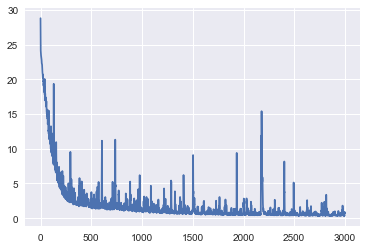

In [15]:

model = Sequential()


model.add(Dense(14, input_dim=X_train.shape[1], kernel_initializer='random_normal', activation='relu'))
model.add(Dense(7,  kernel_initializer='random_normal',activation='relu'))
model.add(Dense(1, kernel_initializer='random_normal',kernel_constraint=non_neg(),bias_constraint=non_neg()))


model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train,Y_train, epochs=3000,verbose=2)
scores = model.evaluate(X_train, Y_train) 
plt.plot(history.history['loss'])

In [16]:
predictions = model.predict(X_test)
print(predictions)

[[ 0.72608995]
 [ 7.8090053 ]
 [ 0.43820232]
 [ 0.8723237 ]
 [ 3.7157545 ]
 [ 6.1128926 ]
 [ 3.6682875 ]
 [ 0.43820232]
 [11.131882  ]
 [ 0.43820232]
 [ 6.0597343 ]
 [ 6.166676  ]
 [ 0.43820232]
 [25.996943  ]
 [ 0.43820232]
 [ 0.43820232]
 [ 0.43820232]
 [12.552366  ]
 [ 3.6805165 ]
 [ 1.3719058 ]
 [ 0.43820232]
 [ 0.43820232]
 [ 0.43820232]
 [ 0.9059746 ]
 [ 1.7733712 ]
 [ 1.1464152 ]
 [ 1.8727946 ]
 [ 3.2958596 ]
 [ 1.2257174 ]
 [ 3.5758448 ]
 [13.030199  ]
 [ 2.2937007 ]
 [ 0.43820232]
 [ 7.052733  ]
 [ 7.4731007 ]
 [ 0.7385831 ]
 [ 3.5631812 ]
 [ 2.4098654 ]
 [ 0.43820232]
 [ 0.8894483 ]
 [ 4.218171  ]
 [11.346913  ]
 [ 1.4341244 ]
 [ 3.7250888 ]
 [ 0.8516974 ]
 [ 0.652062  ]
 [ 3.309573  ]
 [ 0.43820232]
 [ 4.959533  ]
 [ 0.95911944]
 [ 0.43820232]
 [18.464293  ]
 [ 0.43820232]
 [ 5.8111987 ]
 [18.181377  ]
 [ 0.43820232]
 [ 1.0115082 ]
 [ 0.43820232]
 [ 0.45775467]
 [ 0.9100216 ]
 [ 0.43820232]
 [ 5.98945   ]
 [ 0.43820232]
 [ 5.4256716 ]
 [ 2.1492703 ]
 [ 7.219134  ]
 [ 1.21014

In [17]:
prediction = pd.DataFrame(predictions, columns=['time']).to_csv('prediction7.csv')

In [18]:
temp=pd.read_csv('C:/Users/kks20/prediction7.csv')
temp.head()
temp2=temp.values
Y_2=temp2[:,1]
print(Y_2)

[ 0.72608995  7.8090053   0.43820232  0.8723237   3.7157545   6.1128926
  3.6682875   0.43820232 11.131882    0.43820232  6.0597343   6.166676
  0.43820232 25.996943    0.43820232  0.43820232  0.43820232 12.552366
  3.6805165   1.3719058   0.43820232  0.43820232  0.43820232  0.9059746
  1.7733712   1.1464152   1.8727946   3.2958596   1.2257174   3.5758448
 13.030199    2.2937007   0.43820232  7.052733    7.4731007   0.7385831
  3.5631812   2.4098654   0.43820232  0.8894483   4.218171   11.346913
  1.4341244   3.7250888   0.8516974   0.652062    3.309573    0.43820232
  4.959533    0.95911944  0.43820232 18.464293    0.43820232  5.8111987
 18.181377    0.43820232  1.0115082   0.43820232  0.45775467  0.9100216
  0.43820232  5.98945     0.43820232  5.4256716   2.1492703   7.219134
  1.2101427   0.43820232 10.483363    2.0694394   0.43820232  0.43820232
 10.292341    0.43820232  4.095031    4.0289793   1.193104    6.3254995
  3.7872155   0.43820232  6.067224    6.941853    8.87876     1.43

In [19]:
rms = mean_squared_error(Y_1, Y_2)
print(rms)

1.926067814637257
